<a href="https://colab.research.google.com/github/ethanmjansen/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS10_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import t, ttest_1samp
from scipy import stats


In [0]:
#Bash Command to get the URL 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-06 03:50:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-06 03:50:43 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
#Data Wrangling

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data',
                 header = None,
                 names=column_headers,
                 na_values = '?')

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# Replacing Yes and No with Binary Value
df.replace({'y': 1, 'n': 0}, inplace=True)
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Define a Confidence Interval and respresent it numerically

def confidence_interval(data, confidence = 0.95):
  
  data = data.dropna()
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof = 1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)

  return(mean - moe, mean, mean + moe)

In [0]:
confidence_interval(df['budget'])

(0.5498151808536169, 0.5966981132075472, 0.6435810455614774)

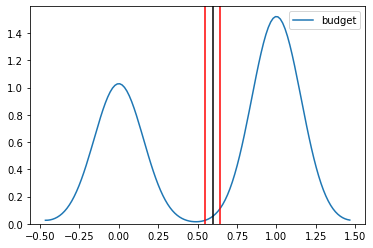

In [0]:
#Confidence Interval visualized 

sns.kdeplot(df['budget'].dropna())
CI = confidence_interval(df['budget'])
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='black');

In [0]:
# Ttest 

ttest_1samp(df['budget'].dropna(), .596)

Ttest_1sampResult(statistic=0.029268709822300502, pvalue=0.9766640860036937)

My interpretation of this graph is that I can confidently say that there was more support for the budget bill because the mean and confidence interval are above 50%. 

In [0]:
new_column_headers = ['sepal length in cm',
                      'sepal width in cm',
                      'petal length in cm',
                      'petal width in cm',
                      'class']

new_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names = new_column_headers)

new_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
new_df.tail()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Using SciPy**

In [0]:
# I NEED CATEGORICAL VARIABLES TO DO A CHI^2 TEST

cut_points = [1, 1.5, 3, 4.5, 6, 50]
label_names = ['1-1.5', '1.5-3', '3-4.5', '4.5-6', '6+']
new_df['petal_length_cat'] = pd.cut(new_df['petal length in cm'], cut_points, labels=label_names)

In [0]:
contingency_table = pd.crosstab(new_df['class'], new_df['petal_length_cat'], margins=True)

contingency_table

petal_length_cat,1-1.5,1.5-3,3-4.5,4.5-6,6+,All
class,,,,,,
Iris-setosa,36,13,0,0,0,49
Iris-versicolor,0,1,35,14,0,50
Iris-virginica,0,0,1,40,9,50
All,36,14,36,54,9,149


In [0]:
observed = pd.crosstab(new_df['class'], new_df['petal_length_cat'])

observed

petal_length_cat,1-1.5,1.5-3,3-4.5,4.5-6,6+
class,,,,,
Iris-setosa,36,13,0,0,0
Iris-versicolor,0,1,35,14,0
Iris-virginica,0,0,1,40,9


In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 224.8073901306555
P-value: 3.711314403822796e-44
Degrees of Freedom: 8
Expected: 
 [[11.83892617  4.60402685 11.83892617 17.75838926  2.95973154]
 [12.08053691  4.69798658 12.08053691 18.12080537  3.02013423]
 [12.08053691  4.69798658 12.08053691 18.12080537  3.02013423]]


**Numpy by hand**

In [0]:
contingency_table

petal_length_cat,1-1.5,1.5-3,3-4.5,4.5-6,6+,All
class,,,,,,
Iris-setosa,36,13,0,0,0,49
Iris-versicolor,0,1,35,14,0,50
Iris-virginica,0,0,1,40,9,50
All,36,14,36,54,9,149


In [0]:
iris_setosa = contingency_table.iloc[0][0:5].values
iris_setosa

array([36, 13,  0,  0,  0])

In [0]:
iris_versicolor = contingency_table.iloc[1][0:5].values
iris_versicolor

array([ 0,  1, 35, 14,  0])

In [0]:
iris_virginica = contingency_table.iloc[2][0:5].values

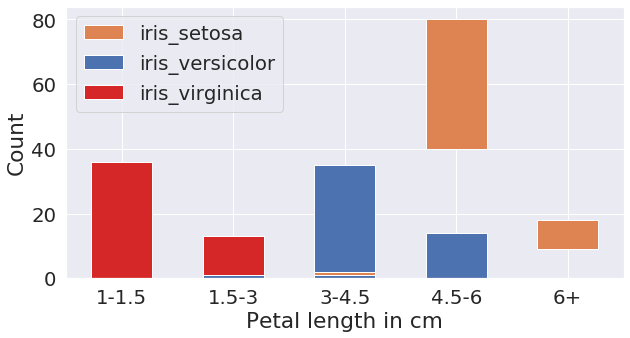

In [0]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['1-1.5', '1.5-3', '3-4.5', '4.5-6', '6+']
p1 = plt.bar(categories, iris_setosa, 0.55, color='#d62728')
p2 = plt.bar(categories, iris_versicolor, 0.55)
p3 = plt.bar(categories, iris_virginica, 0.55, bottom=iris_virginica )
plt.legend((p3[0], p2[0], p1[0]), ('iris_setosa', 'iris_versicolor', 'iris_virginica'))
plt.xlabel('Petal length in cm')
plt.ylabel('Count')
plt.show()

**Stretch Goals:**

1) Summary of findings for 'budget' bill support

Null Hypothesis: X1 == 0.5

Alternate Hypothesis: x1 =/= 0.5

Confidence Interval = 95%

P-value = .97

Conclusion: Due to a P-Value of .97 I can Reject the Null Hypothesis that X1 is equal to .50 (Support for the bill is not split) 

2) Project Data

I don't have my personal project Data yet. 

3) Elegant Code to do what I did in the first stretch goal for all issues.

See code line below

In [0]:
#Elegant Code

def confidence_interval(data, confidence = 0.95):
  
  data = data.dropna()
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof = 1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)
  ttest = ttest_1samp(data, mean)
  
  
  print('Confidence Interval', mean - moe, mean, mean + moe,)
  print(ttest)

  return


In [0]:
confidence_interval(df['water-project'])


Confidence Interval 0.45384081311663604 0.5038759689922481 0.5539111248678601
Ttest_1sampResult(statistic=0.0, pvalue=1.0)


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)